<a href="https://colab.research.google.com/github/rklepov/hse-cs-ml-2018-2019/blob/master/09-NLP/04-word2vec/nlp04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка Tensorflow

[TensorFlow 2.0 Examples](https://github.com/aymericdamien/TensorFlow-Examples/tree/master/tensorflow_v2 "TensorFlow-Examples/tensorflow_v2 at master · aymericdamien/TensorFlow-Examples")

``` pip install tensorflow==2.0.0-beta1  ```

In [1]:
!pip install tensorflow==2.0.0-beta1

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [3]:
a = tf.constant([1,2,3], dtype=tf.float32)
b = tf.zeros([3])+5
c = a + b
c.numpy()

array([6., 7., 8.], dtype=float32)

In [0]:
import numpy as np

def np_sum_squares(N):
    return np.sum(np.arange(N)**2)

In [5]:
%%timeit
np_sum_squares(10**8)

1 loop, best of 3: 492 ms per loop


In [0]:
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [7]:
%%timeit
tf_sum_squares(10**8)

1 loop, best of 3: 435 ms per loop


In [0]:
@tf.function
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [9]:
%%timeit
tf_sum_squares(10**8)

The slowest run took 19580.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 219 µs per loop


In [10]:
tf.keras.__version__

'2.2.4-tf'

In [0]:
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38],  
                      dtype='float32')

fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],
                       dtype='float32')

In [12]:
# параметры модели 
a = tf.Variable(tf.random.normal([1]), name='bias')
b = tf.Variable(tf.random.normal([1]), name='k')

print(a.numpy())
print(b.numpy())

[1.4058977]
[1.7885246]


In [13]:
# Наша модель
def linear_regression(x):
    return a + b*x

linear_regression(celsius)

<tf.Tensor: id=99, shape=(7,), dtype=float32, numpy=
array([-70.135086 , -16.47935  ,   1.4058977,  15.714095 ,  28.233767 ,
        40.75344  ,  69.369835 ], dtype=float32)>

In [14]:
# Ошибка для модели
def mean_square(y_pred, y_true):
    return tf.reduce_mean((y_pred-y_true)**2)

y_pred = linear_regression(celsius)
mean_square(y_pred, fahrenheit)

<tf.Tensor: id=111, shape=(), dtype=float32, numpy=935.9235>

In [0]:
# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# процесс оптимизации
def model_train(X, Y):

    # Указываем нашему дифириенцированию 
    # за какими переменными следить 
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, [a, b])
    # print(gradients)
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [a, b]))
    pass

In [16]:
model_train(celsius, fahrenheit)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
# Обучение
epochs = 2000 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    # Каждую сотую итерацию следим за тем, что произошло
    if i%100 == 0:
        y_pred = linear_regression(celsius)
        loss_val = mean_square(y_pred, fahrenheit)
        print("step: %i, loss: %f, a: %f, b: %f" % (i, loss_val, a.numpy(), b.numpy()))


step: 0, loss: 889.113342, a: 1.525325, b: 2.050935
step: 100, loss: 605.341980, a: 6.846489, b: 2.009826
step: 200, loss: 412.150055, a: 11.237057, b: 1.972773
step: 300, loss: 280.620728, a: 14.859797, b: 1.942200
step: 400, loss: 191.072617, a: 17.848993, b: 1.916973
step: 500, loss: 130.106491, a: 20.315430, b: 1.896158
step: 600, loss: 88.599426, a: 22.350536, b: 1.878983
step: 700, loss: 60.340412, a: 24.029749, b: 1.864812
step: 800, loss: 41.101143, a: 25.415293, b: 1.853119
step: 900, loss: 28.002733, a: 26.558523, b: 1.843471
step: 1000, loss: 19.085026, a: 27.501827, b: 1.835510
step: 1100, loss: 13.013570, a: 28.280176, b: 1.828941
step: 1200, loss: 8.880082, a: 28.922392, b: 1.823521
step: 1300, loss: 6.065903, a: 29.452299, b: 1.819049
step: 1400, loss: 4.149925, a: 29.889540, b: 1.815359
step: 1500, loss: 2.845495, a: 30.250313, b: 1.812315
step: 1600, loss: 1.957401, a: 30.547997, b: 1.809802
step: 1700, loss: 1.352764, a: 30.793621, b: 1.807729
step: 1800, loss: 0.9411

## Собираем свой w2v! 

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
!ls -hlF data/*

-rw------- 1 root root 893M Sep 14 19:03 data/ria_news_2018.pickle

data/news_upos_skipgram_300_5_2019:
total 1.1G
-rw------- 1 root root 1.3K Sep 14 19:03 meta.json
-rw------- 1 root root 292M Sep 14 19:03 model.bin
-rw------- 1 root root 814M Sep 14 19:03 model.txt
-rw------- 1 root root  393 Sep 14 19:03 README


In [20]:
import gensim
gensim.__version__

'3.6.0'

In [21]:
w2v = gensim.models.KeyedVectors.load_word2vec_format("data/news_upos_skipgram_300_5_2019/model.bin",
                                                      binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [22]:
w2v.most_similar('митинг_NOUN')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('митинг_PROPN', 0.5869618654251099),
 ('пикет_NOUN', 0.5843158960342407),
 ('шествие_NOUN', 0.5592673420906067),
 ('верхнепышминц_PROPN', 0.5254683494567871),
 ('брелин_PROPN', 0.5171799659729004),
 ('97-летие_NOUN', 0.5084720849990845),
 ('митинод_NOUN', 0.505733072757721),
 ('демонстрация_NOUN', 0.5037501454353333),
 ('протест_NOUN', 0.5021286606788635),
 ('санкционировать_ADJ', 0.49920910596847534)]

In [23]:
vocabulary = w2v.vocab
len(vocabulary)

249318

In [24]:
len(set([item.split('_')[0] for item in vocabulary.keys()]))

215875

In [25]:
w2v.get_vector('любовь_NOUN').shape

(300,)

In [0]:
# уникальные слова без тэгов
words = list(set([item.split('_')[0] for item in vocabulary.keys()]))

In [27]:
len(words)

215875

In [28]:
import numpy as np 
from tqdm import tqdm_notebook

X = np.zeros([len(words) + 2, 300])

uniq_words = ["#PAD#", "#UNK#"]

i = 2
for word in tqdm_notebook(vocabulary.keys()):
    cur_word = word.split('_')[0]
    if cur_word in uniq_words:
        continue 
       
    uniq_words.append(cur_word)
    X[i] = w2v.get_vector(word)
    i += 1
    if i % 10000 == 0:
        print(i)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000



In [29]:
X.shape

(215877, 300)

In [0]:
np.save('data/emb.npy', X)

In [31]:
len(uniq_words) == X.shape[0]

True

In [0]:
dct = {uniq_words[i] : i for i in range(len(uniq_words))}

In [0]:
import pickle

with open('data/dct.pickle', 'wb') as f:
    pickle.dump(dct, f)

In [34]:
!ls -lh data/*.pickle data/*.npy

-rw-r--r-- 1 root root 7.0M Sep 14 19:27 data/dct.pickle
-rw-r--r-- 1 root root 495M Sep 14 19:27 data/emb.npy
-rw------- 1 root root 893M Sep 14 19:03 data/ria_news_2018.pickle


## Данные

In [0]:
import pickle

# Подгружаем все данные, что у нас есть 
with open('data/ria_news_2018.pickle', 'rb') as f:
    ria_news = pickle.load(f)

In [36]:
ria_news[0]

{'category': 'В мире',
 'date': '2018-12-31',
 'day': '31',
 'href': '/20181231/1548961410.html',
 'image': 'https://cdn25.img.ria.ru/images/153303/06/1533030626_0:247:3501:2216_1036x0_80_0_0_291c92f1d31f7b2a613588e6a96164cb.jpg',
 'keywords': 'биньямин нетаньяху, израиль, в мире',
 'month': '12',
 'shows': '728',
 'snippet': 'Премьер-министр Израиля Биньямин Нетаньяху не намерен уходить в отставку в случае предъявления ему обвинений в коррупции, сообщает израильский телеканал i24... РИА Новости, 31.12.2018',
 'tags': 'Биньямин Нетаньяху, Израиль, В мире',
 'text': 'МОСКВА, 31 дек - РИА Новости. Премьер-министр Израиля Биньямин Нетаньяху не намерен уходить в отставку в случае предъявления ему обвинений в коррупции, сообщает израильский телеканал i24 News. В начале декабря полиция рекомендовала генпрокуратуре предъявить обвинения в коррупции Нетаньяху и его супруге Саре по итогам расследования дела об их отношениях с руководством крупнейшей в стране телекоммуникационной компании "Безек"

In [37]:
set([item['category'] for item in ria_news])

{'',
 'Акценты - Радио Sputnik',
 'АртВывих',
 'В мире',
 'Видеоблоги - Радио Sputnik',
 'Инфографика',
 'Культура',
 'Навигатор абитуриента',
 'Наука',
 'Недвижимость',
 'Общество',
 'Политика',
 'Программы - Радио Sputnik',
 'Происшествия',
 'Радио',
 'Религия',
 'Сказано в эфире - Радио Sputnik',
 'Социальный навигатор',
 'Спецпроекты - Радио Sputnik',
 'Спорт',
 'Теория заблуждений',
 'Туризм',
 'Экономика'}

In [38]:
len([item for item in ria_news if item['category'] == ''])

32896

In [39]:
len([item for item in ria_news if item['category'] != ''])

168901

In [0]:
ria_news = [item for item in ria_news if item['category'] != '']

In [0]:
title = [item['title'] for item in ria_news]
category = [item['category'] for item in ria_news]

In [42]:
dct['война']

462

In [43]:
X[462][:5]

array([ 0.56003535,  0.11304086, -0.16566475, -0.10764477, -0.37499669])

In [0]:
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def prepare_text(text, limit):
    text = re.sub('[^а-яa-zё]', ' ', text.lower())
    clear_text = tokenizer.tokenize(text)
    
    clear_text = [dct.get(item, 1) for item in clear_text] 
    
    if len(clear_text) < limit:
        clear_text += [0]*(limit - len(clear_text))
    return clear_text[:limit]

In [45]:
prepare_text(title[0], 15)

[5229, 8815, 1, 1, 100828, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

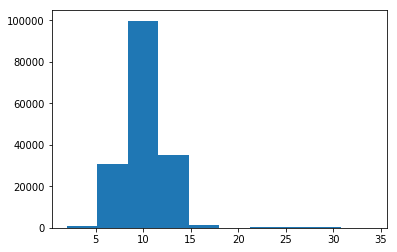

In [46]:
import matplotlib.pyplot as plt
plt.hist([len(text.split(' ')) for text in title]);

In [47]:
%%time
TITLE_LEN = 10

X_title = [prepare_text(text, TITLE_LEN) for text in title]

CPU times: user 2.07 s, sys: 71 ms, total: 2.14 s
Wall time: 2.11 s


In [48]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
category_labled = lbl.fit_transform(category)
category_labled 

array([2, 2, 2, ..., 8, 2, 2])

In [49]:
# Сделали OHE для таргета! 
tf.keras.utils.to_categorical(category_labled [:5])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
y = tf.keras.utils.to_categorical(category_labled)

In [0]:
from sklearn.model_selection import train_test_split

Xt_train, Xt_test, y_train, y_test = train_test_split(X_title,y,
                                                      test_size=0.2)

## Архитектура! 

In [52]:
X.shape  # эмбединги

word_embeddings = tf.Variable(X, name="word_embeddings",
                               trainable=False)

word_embeddings[0][:10]

<tf.Tensor: id=128541, shape=(10,), dtype=float64, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>

In [53]:
y.shape

(168901, 22)

In [0]:
import tensorflow.keras.layers as L

fc_layer_11 = L.Dense(32, activation = tf.nn.relu)
fc_layer_12 = L.Dense(32, activation = tf.nn.relu)
fc_layer_2 = L.Dense(y.shape[1], activation = tf.nn.softmax)

def best_in_the_world_net(y, X):
    # подставляет эмбединги вместо слов, [число текстов x 10 x 300]
    title_emb = tf.nn.embedding_lookup(word_embeddings, X)
    
    # усреднение [число текстов x 300]
    emb1 = tf.reduce_mean(title_emb, axis=1)
    
    # возмём покоординатно максимум
    emb2 = tf.reduce_max(title_emb, axis=1)
    
    # h = emb * W 
    emb1 = fc_layer_11(emb1)
    emb2 = fc_layer_12(emb2)
    
    # запишем среднее и максимум друг за другом
    emb = tf.concat([emb1, emb2], axis=1)
    
    # готовим 22 класса и применяем softmax 
    emb = fc_layer_2(emb)
    return emb

In [55]:
best_in_the_world_net(y_train[:2], Xt_train[:2])

<tf.Tensor: id=128631, shape=(2, 22), dtype=float64, numpy=
array([[0.03845026, 0.03824483, 0.03349015, 0.05680995, 0.04239835,
        0.07158014, 0.03111369, 0.05929138, 0.03148329, 0.03834314,
        0.03703201, 0.06029752, 0.06977568, 0.03922255, 0.06548361,
        0.04478958, 0.03917651, 0.04607931, 0.03135425, 0.04611233,
        0.04173996, 0.03773152],
       [0.03743768, 0.03552127, 0.02537532, 0.0687421 , 0.03280779,
        0.09234837, 0.02854833, 0.06083245, 0.02725756, 0.02532187,
        0.03514267, 0.04942198, 0.08396262, 0.03590354, 0.05161808,
        0.03613733, 0.03565905, 0.05539055, 0.03153412, 0.05540258,
        0.05841625, 0.03721848]])>

In [56]:
p_pred = best_in_the_world_net(y_train[:2], Xt_train[:2])
p_pred

<tf.Tensor: id=128655, shape=(2, 22), dtype=float64, numpy=
array([[0.03845026, 0.03824483, 0.03349015, 0.05680995, 0.04239835,
        0.07158014, 0.03111369, 0.05929138, 0.03148329, 0.03834314,
        0.03703201, 0.06029752, 0.06977568, 0.03922255, 0.06548361,
        0.04478958, 0.03917651, 0.04607931, 0.03135425, 0.04611233,
        0.04173996, 0.03773152],
       [0.03743768, 0.03552127, 0.02537532, 0.0687421 , 0.03280779,
        0.09234837, 0.02854833, 0.06083245, 0.02725756, 0.02532187,
        0.03514267, 0.04942198, 0.08396262, 0.03590354, 0.05161808,
        0.03613733, 0.03565905, 0.05539055, 0.03153412, 0.05540258,
        0.05841625, 0.03721848]])>

In [0]:
y_true = y_train[:2]

In [58]:
# Ошибка для модели
def logloss(p_pred, y_true):
    return tf.reduce_mean(-1*tf.reduce_sum(y_true*tf.math.log(p_pred),
                                           axis=1),axis=0)
logloss(p_pred, y_train[:2])

<tf.Tensor: id=128665, shape=(), dtype=float64, numpy=3.5362954361814127>

In [0]:
# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

In [0]:
# процесс оптимизации
def model_train(X, Y):

    # Указываем нашему дифириенцированию 
    # за какими переменными следить 
    with tf.GradientTape() as g:
        pred = best_in_the_world_net(X)
        loss = logloss(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, [a, b])
    # print(gradients)
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [a, b]))
    pass

In [0]:
model_train(X, Y)

In [62]:
# ОУ ЩИТ! 
p_pred.trainable_variables

AttributeError: ignored

# ЗАНОВО! 

In [0]:
from tensorflow.keras import Model

class NeuralNet_2(Model):
    # инициализация всех слоёв 
    def __init__(self):
        super(NeuralNet_2, self).__init__()
        self.fc_layer_11 = L.Dense(32, activation = tf.nn.relu)
        self.fc_layer_12 = L.Dense(32, activation = tf.nn.relu)
        self.fc_layer_2 = L.Dense(y.shape[1], activation = tf.nn.softmax)

    # примение 
    def call(self, X, is_training=False):
        
        # подставляет эмбединги вместо слов, [число текстов x 10 x 300]
        title_emb = tf.nn.embedding_lookup(word_embeddings, X)
        
        # усреднение [число текстов x 300]
        emb1 = tf.reduce_mean(title_emb, axis=1)

        # возмём покоординатно максимум
        emb2 = tf.reduce_max(title_emb, axis=1)

        # h = emb * W 
        emb1 = self.fc_layer_11(emb1)
        emb2 = self.fc_layer_12(emb2)

        # запишем среднее и максимум друг за другом
        emb = tf.concat([emb1, emb2], axis=1)

        # готовим 22 класса и применяем softmax 
        emb = self.fc_layer_2(emb)
        return emb

In [0]:
# Build neural network model.
neural_net = NeuralNet_2()

In [65]:
neural_net.call(Xt_train[:2])

<tf.Tensor: id=128755, shape=(2, 22), dtype=float64, numpy=
array([[0.02899127, 0.02349801, 0.041591  , 0.03988502, 0.08282671,
        0.05392282, 0.06236331, 0.02518392, 0.06473185, 0.05601886,
        0.05685903, 0.03179526, 0.04350142, 0.05110354, 0.04499397,
        0.04123668, 0.04929401, 0.03785748, 0.04544479, 0.04061584,
        0.04424725, 0.03403798],
       [0.036742  , 0.0331822 , 0.02356895, 0.03610584, 0.09100627,
        0.03991464, 0.09712635, 0.02545539, 0.11183582, 0.08450206,
        0.03871573, 0.02780442, 0.03617265, 0.02741396, 0.03640757,
        0.03644597, 0.03830158, 0.06005799, 0.03308698, 0.03780269,
        0.0342231 , 0.01412785]])>

In [0]:
# процесс оптимизации
def model_train(X, Y):

    # Указываем нашему дифириенцированию 
    # за какими переменными следить 
    with tf.GradientTape() as g:
        pred = neural_net(X)
        loss = logloss(pred, Y)
    
    # вытаскиваем переменные для взятия производных
    trainable_variables = neural_net.trainable_variables
    
    # Вычисляем градиенты
    gradients = g.gradient(loss, trainable_variables)
#     for item in gradients:
#         print(item.shape)
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    pass

In [0]:
model_train(Xt_train[:2], y_train[:2])

In [68]:
# Обучение
epochs = 5 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(Xt_train, y_train)
    
    # Каждую сотую итерацию следим за тем, что произошло
    y_pred = neural_net(Xt_test)
    loss_val = logloss(y_pred, y_test)
    print("step: %i, loss: %f" % (i, loss_val))


step: 0, loss: 3.374638
step: 1, loss: 3.367813
step: 2, loss: 3.361062
step: 3, loss: 3.354387
step: 4, loss: 3.347785


### Пример со свёрткой

In [0]:
conv = L.Conv1D(1, 4)# , padding='same')

In [70]:
emb = tf.nn.embedding_lookup(word_embeddings, Xt_train[:2])
emb.shape

TensorShape([2, 10, 300])

In [71]:
conv(emb).shape

TensorShape([2, 7, 1])